Instructions: Make a copy of this notebook and rename into the format `ID.ipynb` (example: `12345678.ipynb`). Read all the comments and write appropriate code after any place that says `# YOUR CODE HERE`. When the daily evaluation tasks are revealed, append their solutions at the end of this notebook.

---

Part 1: Polynomial Root Finding Using Bisection Method
---

### `pandas` Dataframe:
Before we start we will know a little about `pandas` dataframe. `pandas` is a python library. Dataframes are classes that are used to store complex data. You can initialize one as a python dictionary. Let's take a look.

In [ ]:
import pandas as pd

x = [0, 1, 2, 3, 4, 5, 6, 7]
y = [1.0, 5.2, 3.9, 8.4, 14.6, 12.3, 8.9, 10.2]

dictionary = {
    "x": x,
    "y": y,
}
df = pd.DataFrame(dictionary)
df.head(8)

,x,y
0,0,1.0
1,1,5.2
2,2,3.9
3,3,8.4
4,4,14.6
5,5,12.3
6,6,8.9
7,7,10.2


We can use it to print data in a tabular format. We can even use more numpy arrays with it.

In [ ]:
import numpy as np

x = np.linspace(0, np.pi/2, 15)
y = np.sin(x)

dictionary = {
    "x": x,
    "sin(x)": y,
}
df = pd.DataFrame(dictionary)
df.head(5)

,x,sin(x)
0,0.000000,0.000000
1,0.112200,0.111964
2,0.224399,0.222521
3,0.336599,0.330279
4,0.448799,0.433884


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['x'].plot(kind='hist', bins=20, title='x')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['sin(x)'].plot(kind='hist', bins=20, title='sin(x)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='index', y='x', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='x', y='sin(x)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['x']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'x'}, axis=1)
              .sort_values('x', ascending=True))
  xs = counted['x']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('x', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('x')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['sin(x)']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'sin(x)'}, axis=1)
              .sort_values('sin(x)', ascending=True))
  xs = counted['sin(x)']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('sin(x)', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('sin(x)')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_8['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['x'].plot(kind='line', figsize=(8, 4), title='x')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['sin(x)'].plot(kind='line', figsize=(8, 4), title='sin(x)')
plt.gca().spines[['top', 'right']].set_visible(False)

### Root Finding:
Let $f(x)$ be a function of $x$. if for some $x=\alpha, f(x) = f(\alpha) = 0$, we say $\alpha$ is a root of function $x$.

Let,
$$f(x) = x^5 + 2.5x^4 - 2x^3 -6x^2 + 0.5x + 2\tag{6.1}$$

The graph of $f(x)$ looks like this.

In [ ]:
from numpy.polynomial import Polynomial
import matplotlib.pyplot as plt

f = Polynomial([2.0, 0.5, -6.0, -2.0, 2.5, 1.0])
x = np.linspace(-2.5, 1.5, 100)
y = f(x)

plt.axhline(y=0, color='r')
plt.plot(x, y,'y')
plt.plot(f.roots(), [0.0]*5, 'go')
print(f.roots())

Roots are the points where the graph intersects with the $X$-axis.

### Bisection

One way to find out root's are to use bisection method. Here is the strategy, if $\alpha$ is a root between and interval $[a, b]$ then graph will cross the $X$-axis at $\alpha$. So, $sign( f(\alpha-h) ) = - sign( f(\alpha+h) )$, for small value of $h$.

So, we can work our way up towards the root by taking average of $a$ and $b$, as long as the signs are different.

we will start with $a_0$ and $b_0$, such that, $f(a_0) f(b_0) < 0$.
Then we iterate as this,
\begin{align}
m_k &= \frac{a_k + b_k}{2} \\
\text{if, } f(a_k) f(m_k) < 0, \text{ then, } a_{k+1} &= a_k \text{ and } b_{k+1} = m_k\\
\text{else, } a_{k+1} &= m_k \text{ and, } b_{k+1} = b_k
\end{align}

We keep iterating until we find the root with sufficient precision. We usually use a formula like this,
$$
\frac{|m_{k+1} - m_k|}{|m_{k+1}|} \leq \epsilon \\  
$$
Where, $\epsilon$ is a very small value, like $\epsilon < 10^{-6}$

## Task 1 - 2 Marks
Complete the code below to iterate and solve for a root of the following equation, between the interval, $[-0.5, 1.3]$:
\begin{aligned}
    f(x) = 2 + 0.5x - 6x^2 - 2x^3 + 2.5x^4 + x^5.
\end{aligned}

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

# The polynomial and the range is defined for you
f = Polynomial([2.0, 0.5, -6.0, -2.0, 2.5, 1.0])
a = -0.5
b = 1.3
m = (a + b) / 2
e = 1e-6

root = 0.0    # You need to update this value

# Populate the following lists in each iteration
list_a = []
list_b = []
list_m = []
list_f = []


# YOUR CODE HERE
state=True
while state:
    list_a.append(a)
    list_b.append(b)
    list_m.append(m)
    list_f.append(f(m))

    if f(b)*f(m)<0:
        a=m
    if f(b)*f(m)>0:
        b=m
    elif f(a)*f(b)==m:
      state=False
      root=m
      break
    m_k=m
    m=(a+b)/2
    if abs((m-m_k)/abs(m_k))<=e:
        state=False
        root=m

In [ ]:
xs = np.linspace(-2.5, 1.5, 100)
ys = f(xs)

           a         b         m          f(m)
0  -0.500000  1.300000  0.400000  1.186240e+00
1   0.400000  1.300000  0.850000 -1.389529e+00
2   0.400000  0.850000  0.625000 -4.269409e-02
3   0.400000  0.625000  0.512500  6.189171e-01
4   0.512500  0.625000  0.568750  2.966661e-01
5   0.568750  0.625000  0.596875  1.286523e-01
6   0.596875  0.625000  0.610938  4.333223e-02
7   0.610938  0.625000  0.617969  3.991260e-04
8   0.617969  0.625000  0.621484 -2.112851e-02
9   0.617969  0.621484  0.619727 -1.035982e-02
10  0.617969  0.619727  0.618848 -4.979112e-03
11  0.617969  0.618848  0.618408 -2.289682e-03
12  0.617969  0.618408  0.618188 -9.452003e-04
13  0.617969  0.618188  0.618079 -2.730176e-04
14  0.617969  0.618079  0.618024  6.305907e-05
15  0.618024  0.618079  0.618051 -1.049781e-04
16  0.618024  0.618051  0.618037 -2.095919e-05
17  0.618024  0.618037  0.618031  2.105002e-05
18  0.618031  0.618037  0.618034  4.543651e-08
19  0.618034  0.618037  0.618036 -1.045687e-05
20  0.618034 

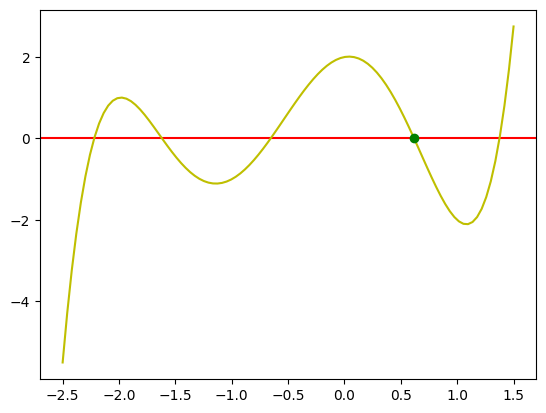

In [ ]:
plt.axhline(y=0, color='r')
plt.plot(xs, ys,'y')
plt.plot(root, f(root), 'go')

print(pd.DataFrame({'a':list_a, 'b':list_b, 'm':list_m, 'f(m)':list_f}))

assert "{:.3f}".format(root) == "0.618"

# Part 2: Fixed Point Iteration

### Fixed point:
A number $\xi$ is called a **fixed point** to function $g(x)$ if $g(\xi) = \xi$. Using fixed points are a nice strategy to find roots of an equation. In this method if we are trying to find a root of $f(x) = 0$, we try to write the function in the form, $x = g(x)$. That is,
$$
f(x) = x - g(x) = 0
$$

So, if $\xi$ is a fixed point of $g(x)$ it would also be a root of $f(x)=0$, because,
$$
f(\xi) = \xi - g(\xi) = \xi - \xi = 0
$$

We can find a suitable $g(x)$ in any number of ways. Not all of them would converge; whereas, some would converge very fast. For example, consider $Eq. 6.1$.

\begin{align}
&         &    f(x) &=x^5 + 2.5x^4 - 2x^3 -6x^2 + x + 2 \\
&\implies &x - g(x) &=x^5 + 2.5x^4 - 2x^3 -6x^2 + x + 2 \\
&\implies &    g(x) &=-x^5 - 2.5x^4 + 2x^3 + 6x^2 - 2 \tag{6.2}\\
\end{align}

again,
$$
f(x) = x^5 + 2.5x^4 - 2x^3 -6x^2 + x + 2 = 0\\
$$
\begin{align}
&\implies &6x^2 &= x^5 + 2.5x^4 - 2x^3 + x + 2 \\
&\implies &x^2  &= \frac{1}{6}(x^5 + 2.5x^4 - 2x^3 + x + 2)\\
&\implies &x    &= \sqrt{\frac{1}{6}(x^5 + 2.5x^4 - 2x^3 + x + 2)}\\
&\implies &g(x) &= \sqrt{\frac{1}{6}(x^5 + 2.5x^4 - 2x^3 + x + 2)}\tag{6.3}\\
\end{align}

Similarly,
\begin{align}
&         &2.5x^4 &= -x^5 + 2x^3 + 6x^2 - x - 2 \\
&\implies &x^4  &= \frac{1}{2.5}(-x^5 + 2x^3 + 6x^2 - x - 2)\\
&\implies &x    &= \sqrt[\leftroot{-1}\uproot{2}\scriptstyle 4]{\frac{1}{2.5}(-x^5 + 2x^3 + 6x^2 - x - 2)}\\
&\implies &g(x) &= \sqrt[\leftroot{-1}\uproot{2}\scriptstyle 4]{\frac{1}{2.5}(-x^5 + 2x^3 + 6x^2 - x - 2)}\tag{6.4}\\
\end{align}

## Task 2 -  2 Marks
For this example we will use a couple of $g(x)$ function to find out which one converges faster.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

f = Polynomial([2.0, 1.0, -6.0, -2.0, 2.5, 1.0])
g1 = Polynomial([-2.0, 0.0, 6.0, 2.0, -2.5, -1.0])

def g2(x):
    p = Polynomial([2.0, 1.0, 0.0, -2.0, 2.5, 1.0])
    return np.sqrt(p(x)/6)

def g3(x):
    p = Polynomial([-2.0, -1.0, 6.0, 2.0, 0.0, -1.0])
    return np.power(p(x)/2.5, 1.0/4.0)

a1 = 0.80
g1_a = [a1]

a2 = 0.80
g2_a = [a2]

a3 = 0.80
g3_a = [a3]

# YOUR CODE HERE
for i in range(50):
  p=g1(a1)
  g1_a.append(p)
  a1=p
  q=g2(a2)
  g2_a.append(q)
  a2=q
  r=g3(a3)
  g3_a.append(r)
  a3=r

       g1(x)     g2(x)    g3(x))
0   0.800000  0.800000  0.800000
1   1.512320  0.721997  0.912898
2  -2.347605  0.688573  1.044444
3   0.562201  0.677301  1.160638
4  -0.054108  0.673860  1.241682
5  -1.982772  0.672844  1.288278
6  -1.995936  0.672547  1.311548
7  -1.999770  0.672460  1.322205
8  -1.999999  0.672435  1.326870
9  -2.000000  0.672427  1.328868
10 -2.000000  0.672425  1.329716
11 -2.000000  0.672425  1.330075
12 -2.000000  0.672424  1.330226
13 -2.000000  0.672424  1.330290
14 -2.000000  0.672424  1.330317
15 -2.000000  0.672424  1.330328
16 -2.000000  0.672424  1.330333
17 -2.000000  0.672424  1.330335
18 -2.000000  0.672424  1.330336
19 -2.000000  0.672424  1.330336
20 -2.000000  0.672424  1.330336
21 -2.000000  0.672424  1.330336
22 -2.000000  0.672424  1.330336
23 -2.000000  0.672424  1.330336
24 -2.000000  0.672424  1.330336
25 -2.000000  0.672424  1.330336
26 -2.000000  0.672424  1.330336
27 -2.000000  0.672424  1.330336
28 -2.000000  0.672424  1.330336
29 -2.0000

<ipython-input-31-703c2130b5b6>:15: RuntimeWarning: invalid value encountered in power
  return np.power(p(x)/2.5, 1.0/4.0)


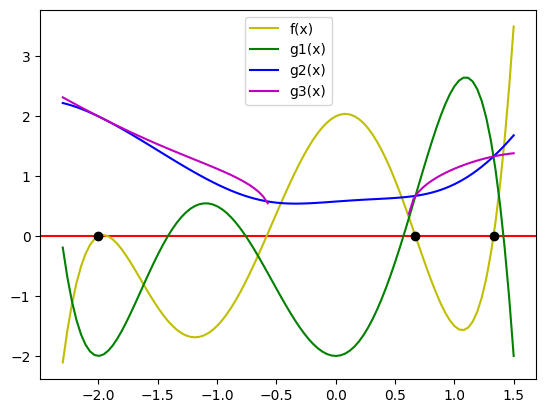

In [ ]:
xs = np.linspace(-2.3, 1.5, 100)
ys = f(xs)
dictionary = {
    'x': xs,
    'y': ys
}
plt.axhline(y=0, color='r')
plt.plot(xs, f(xs), label='f(x)', color='y')
plt.plot(xs, g1(xs), label='g1(x)', color='g')
plt.plot(xs, g2(xs), label='g2(x)', color ='b')
plt.plot(xs, g3(xs), label='g3(x)', color = 'm' )
plt.legend()

if len(g1_a) > 0:
    root = np.array([g1_a[len(g1_a)-1], g2_a[len(g2_a)-1], g3_a[len(g3_a)-1]])
    plt.plot(root, f(root), 'ko')

print(pd.DataFrame({'g1(x)':g1_a, 'g2(x)':g2_a, 'g3(x))':g3_a,}))

# Test case:
np.testing.assert_array_almost_equal(root, [-2, 0.67242436, 1.33033625])

# Daily Evaluation - 4 Marks

In [ ]:
f1 = Polynomial([1.0, -111, 1100])
a3 = 0
b1 = 99
m1 = (a1 + b1) / 2
e = 1e-6
root1 = 0.0    # You need to update this value

# Populate the following lists in each iteration
list_a1 = []
list_b1 = []
list_m1 = []
list_f1 = []


# YOUR CODE HERE
state=True
while state:
    list_a1.append(a)
    list_b1.append(b)
    list_m1.append(m)
    list_f1.append(f(m))

    if f(b1)*f(m1)<0:
        a1=m1
    if f(b1)*f(m1)>0:
        b1=m1
    elif f(a1)*f(b1)==m1:
      state=False
      root=m1
      break
    m_k_1=m1
    m1=(a1+b1)/2
    if abs((m1-m_k_1)/abs(m_k_1))<=e:
        state=False
        root1=m1

In [ ]:
xs1 = np.linspace(0, 1.5, 1000)
ys1 = f1(xs1)

           a         b         m      f(m)
0   0.618034  0.618035  0.618034  0.309015
1   0.618034  0.618035  0.618034  0.309015
2   0.618034  0.618035  0.618034  0.309015
3   0.618034  0.618035  0.618034  0.309015
4   0.618034  0.618035  0.618034  0.309015
5   0.618034  0.618035  0.618034  0.309015
6   0.618034  0.618035  0.618034  0.309015
7   0.618034  0.618035  0.618034  0.309015
8   0.618034  0.618035  0.618034  0.309015
9   0.618034  0.618035  0.618034  0.309015
10  0.618034  0.618035  0.618034  0.309015
11  0.618034  0.618035  0.618034  0.309015
12  0.618034  0.618035  0.618034  0.309015
13  0.618034  0.618035  0.618034  0.309015
14  0.618034  0.618035  0.618034  0.309015
15  0.618034  0.618035  0.618034  0.309015
16  0.618034  0.618035  0.618034  0.309015
17  0.618034  0.618035  0.618034  0.309015
18  0.618034  0.618035  0.618034  0.309015
19  0.618034  0.618035  0.618034  0.309015
20  0.618034  0.618035  0.618034  0.309015
21  0.618034  0.618035  0.618034  0.309015
22  0.61803

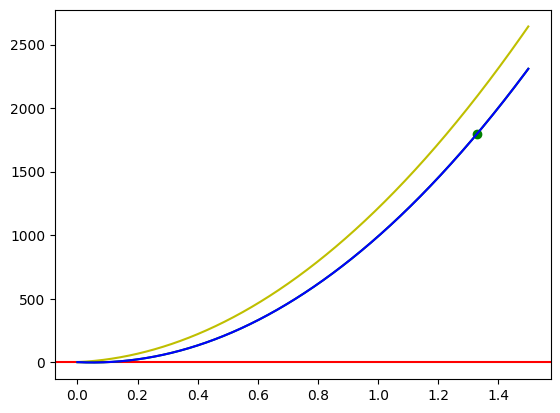

In [ ]:
plt.axhline(y=0, color='r')
plt.plot(xs1, ys1,'y')
plt.plot(root1, f1(root1), 'go')
plt.plot(f1_a3, f1(xs1), label='g1(x)', color='g')
plt.plot(xs1, f1(xs1), label='g2(x)', color ='b')

print(pd.DataFrame({'a':list_a1, 'b':list_b1, 'm':list_m1, 'f(m)':list_f1}))

In [ ]:
f1_a3 = [a3]
g1_a=[b1]
i=0
while i>101:
  p1=f1(a3)
  f1_a3.append(p1)
  a3=p1
  q1=f1(b1)
  g1_a.append(q1)
  b1=q1
  i+=1

           a         b         m      f(m)
0   0.618034  0.618035  0.618034  0.309015
1   0.618034  0.618035  0.618034  0.309015
2   0.618034  0.618035  0.618034  0.309015
3   0.618034  0.618035  0.618034  0.309015
4   0.618034  0.618035  0.618034  0.309015
5   0.618034  0.618035  0.618034  0.309015
6   0.618034  0.618035  0.618034  0.309015
7   0.618034  0.618035  0.618034  0.309015
8   0.618034  0.618035  0.618034  0.309015
9   0.618034  0.618035  0.618034  0.309015
10  0.618034  0.618035  0.618034  0.309015
11  0.618034  0.618035  0.618034  0.309015
12  0.618034  0.618035  0.618034  0.309015
13  0.618034  0.618035  0.618034  0.309015
14  0.618034  0.618035  0.618034  0.309015
15  0.618034  0.618035  0.618034  0.309015
16  0.618034  0.618035  0.618034  0.309015
17  0.618034  0.618035  0.618034  0.309015
18  0.618034  0.618035  0.618034  0.309015
19  0.618034  0.618035  0.618034  0.309015
20  0.618034  0.618035  0.618034  0.309015
21  0.618034  0.618035  0.618034  0.309015
22  0.61803

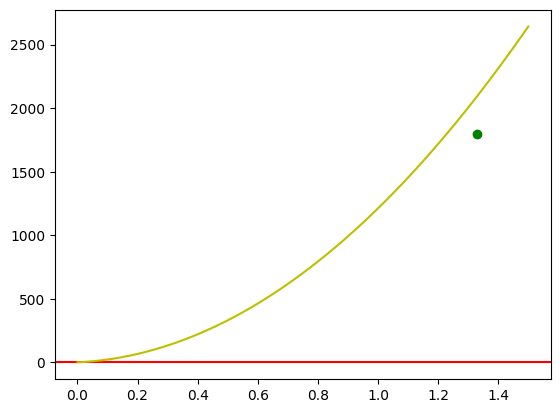

In [ ]:
plt.axhline(y=0, color='r')
plt.plot(xs1, ys1,'y')
plt.plot(root1, f1(root1), 'go')


print(pd.DataFrame({'a':f1_a3, 'b':g1_a, 'a':list_a1, 'b':list_b1, 'm':list_m1, 'f(m)':list_f1 }))

       g1(x)     g2(x)    g3(x))
0   0.800000  0.800000  0.800000
1   1.512320  0.721997  0.912898
2  -2.347605  0.688573  1.044444
3   0.562201  0.677301  1.160638
4  -0.054108  0.673860  1.241682
5  -1.982772  0.672844  1.288278
6  -1.995936  0.672547  1.311548
7  -1.999770  0.672460  1.322205
8  -1.999999  0.672435  1.326870
9  -2.000000  0.672427  1.328868
10 -2.000000  0.672425  1.329716
11 -2.000000  0.672425  1.330075
12 -2.000000  0.672424  1.330226
13 -2.000000  0.672424  1.330290
14 -2.000000  0.672424  1.330317
15 -2.000000  0.672424  1.330328
16 -2.000000  0.672424  1.330333
17 -2.000000  0.672424  1.330335
18 -2.000000  0.672424  1.330336
19 -2.000000  0.672424  1.330336
20 -2.000000  0.672424  1.330336
21 -2.000000  0.672424  1.330336
22 -2.000000  0.672424  1.330336
23 -2.000000  0.672424  1.330336
24 -2.000000  0.672424  1.330336
25 -2.000000  0.672424  1.330336
26 -2.000000  0.672424  1.330336
27 -2.000000  0.672424  1.330336
28 -2.000000  0.672424  1.330336
29 -2.0000

<ipython-input-31-703c2130b5b6>:15: RuntimeWarning: invalid value encountered in power
  return np.power(p(x)/2.5, 1.0/4.0)


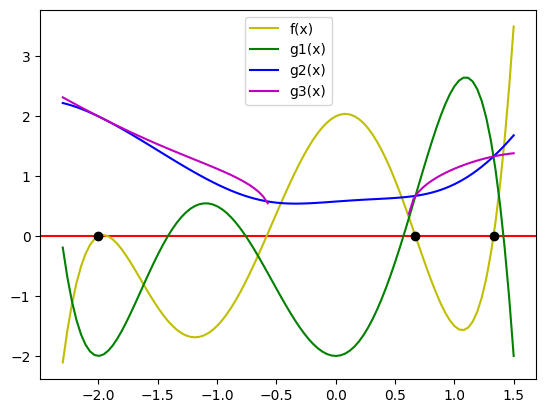

In [ ]:
xs = np.linspace(-2.3, 1.5, 100)
ys = f(xs)
dictionary = {
    'x': xs,
    'y': ys
}
plt.axhline(y=0, color='r')
plt.plot(xs, f(xs), label='f(x)', color='y')
plt.plot(xs, g1(xs), label='g1(x)', color='g')
plt.plot(xs, g2(xs), label='g2(x)', color ='b')
plt.plot(xs, g3(xs), label='g3(x)', color = 'm' )
plt.legend()

if len(g1_a) > 0:
    root = np.array([g1_a[len(g1_a)-1], g2_a[len(g2_a)-1], g3_a[len(g3_a)-1]])
    plt.plot(root, f(root), 'ko')

print(pd.DataFrame({'g1(x)':g1_a, 'g2(x)':g2_a, 'g3(x))':g3_a,}))

# Test case:
np.testing.assert_array_almost_equal(root, [-2, 0.67242436, 1.33033625])